# Making Choices

## Questions

- ¿Cómo pueden mis programas hacer cosas diferentes basadas en valores de datos?

## Objetivos

- Entender "expresiones" y booleanos.

- Escribir declaraciones condicionales incluyendo `if`, `elif`, y `else` ramas.

- Evaluar correctamente las expresiones que contengan `y` y `o`.

- Entender "indexación booleana" con respecto a matrices numpy.

En la Lección 2 comenzamos a examinar datos experimentales y de simulación de radiación, pero tuvimos que dejar fuera nuestro análisis porque no sabíamos lo suficiente. Ahora estamos listos para dar los siguientes pasos. Con el fin de comparar los dos conjuntos de datos, tenemos que tomar un corte a través de la mitad de nuestros datos de simulación, convirtiendo los datos 3D en datos 2D.

Esto es fácil de hacer con numpy, pero primero tenemos que entender un par de conceptos clave.

Expresiones Booleanas

`Verdadero` y `Falso` son palabras especiales en Python llamadas *booleanos*, que representan valores de verdad. Una declaración como 

1 < 0 

devuelve el valor `False`, mientras 

-1 < 0 

devuelve el valor `True` (tenga en cuenta que la capitalización es importante!).

Estas son "expresiones booleanas".

In [1]:
print(10 < 5)
print(10 > 5)
print(type(10 > 5))

my_bool = (10 == 10)
my_bool

False
True
<class 'bool'>


True

Los bools se pueden asignar a variables como otros tipos, y están en el núcleo de "Condicionales". Estas son declaraciones en codificación que siguen diferentes rutas dependiendo del estado de un bool dado.

#Condicionales

Podemos pedirle a Python que tome diferentes acciones, dependiendo de la condición, con una sentencia `if` :

In [2]:
num = 37
if num > 100:
    print('greater')
else:
    print('not greater')
print('done')

not greater
done


La segunda línea de este código usa la palabra clave `if` para decirle a Python que queremos hacer una elección. Si la prueba que sigue a la sentencia `if` es verdadera, se ejecuta el cuerpo de la `if` (es decir, el conjunto de líneas sangradas debajo de ella) y se imprime "mayor". Si la prueba es falsa, el cuerpo del otro se ejecuta en su lugar, y "no mayor" se imprime. Solo uno u otro se ejecuta antes de continuar con la ejecución del programa para imprimir "hecho":

![if flowchart](media/python-flowchart-conditional.png)

Las sentencias condicionales no tienen que incluir un `else`. Si no hay una, Python simplemente no hace nada si la prueba es falsa:


In [3]:
num = 53
print('before conditional...')
if num > 100:
    print(num,' is greater than 100')
print('...after conditional')

before conditional...
...after conditional


También podemos encadenar varias pruebas usando `elif`, que es la abreviatura de "else if". El siguiente código Python usa `elif` para imprimir el signo de un número.

In [4]:
num = -3

if num > 0:
    print(num, 'is positive')
elif num == 0:
    print(num, 'is zero')
else:
    print(num, 'is negative')

-3 is negative


Tenga en cuenta que para probar la igualdad se utiliza un signo doble igual a `=` en lugar de un solo signo igual a `=` que se utiliza para asignar valores.
> ## Comparación en Python
> Junto con los operadores `>` y `=` que ya hemos utilizado para comparar valores en nuestros condicionales, hay algunas opciones más que conocer:
> 
> - `>`: mayor que
> - `<`: menos de
> - `==`: igual a
> - `!=`: no es igual
> - `>=`: superior o igual a
> - `<=`: inferior o igual a

También podemos combinar pruebas usando `y` y `o`. `y` solo es cierto si ambas partes son verdaderas:

In [5]:
if (1 > 0) and (-1 >= 0):
    print('both parts are true')
else:
    print('at least one part is false')

at least one part is false


mientras que `o` es cierto si al menos una parte es verdadera:

In [6]:
if (1 < 0) or (1 >= 0):
    print('at least one test is true')

at least one test is true


# Bools and Numpy
Como vimos anteriormente, las operaciones en matrices numpy ocurren "elementwise". Si agregamos un valor escalar a un array, ese valor se agrega a *cada* elemento del array y si agregamos dos arrays juntos (siempre que tengan la misma forma) cada elemento correspondiente se agrega al elemento en el otro array.

Esto es *también* cierto para las expresiones booleanas.

In [7]:
import numpy as np

# arange is like Python's "range" function, except it returns a numpy array
array = np.arange(10)
print(array)
boolean_array = array <= 5
print(boolean_array)

[0 1 2 3 4 5 6 7 8 9]
[ True  True  True  True  True  True False False False False]


Una expresión que contenga una sola matriz numpy y un escalar evaluará la expresión para cada elemento de la matriz, y de manera similar una expresión entre dos matrices numpy de formas idénticas evaluará los resultados de la expresión mediante el emparejamiento de elementos en ubicaciones equivalentes. Esto es extremadamente útil para realizar evaluaciones a gran escala y a menudo niega la necesidad de usar bucles. Esto se conoce como vectorización y es una habilidad extremadamente útil para desarrollar, pero más allá del alcance de este curso. Pero este no es el único uso para matrices booleanas.

De hecho, en Python podemos usar arrays booleanos para indexar otros arrays, **siempre que sean de la misma forma**. Si hacemos esto:
```
array[array<=5]
```
Python devuelve todos los elementos de `array` donde la matriz booleana `array<=5` evalúa a `True` (i.e. devuelve todos los elementos menos que, o igual a, 5).

In [8]:
array[boolean_array]

array([0, 1, 2, 3, 4, 5])

Podemos usar esto con gran efecto para extraer una sección transversal de nuestros datos de simulación.

Necesitamos un corte a través de los datos que corta a través del centro de la luminancia del led. Esto es aproximadamente `y = 0`. Tenemos tres matrices: coordenadas x, coordenadas y y valores de luminancia. Queremos todas las coordenadas x, y los valores de luminancia que tienen un valor y correspondiente de 0 (o cerca de).

Primero veamos cuál es el valor y más cercano a 0. Para hacer esto podemos usar la función numpy `np.amin()` que encuentra el valor más pequeño en una matriz y `abs()`, una función incorporada en Python que calcula el valor absoluto del argumento que se proporciona.

In [10]:
# load in the data as we did previously
sim = np.loadtxt(fname='data/simulation01.txt', skiprows=52)
x = sim[:, 0]
y = sim[:, 1]
rad = sim[:, 2]

# Find the closest y-value to 0
smallest_y = np.amin(abs(y))
print(smallest_y)


0.25


Ahora podemos usar este valor para extraer todos los valores de x y la luminancia que tienen este valor.

In [11]:
x_cross_section = x[y==smallest_y]
luminance_cross_section = rad[y==smallest_y]

Vamos a trazar nuestros datos, como lo hicimos anteriormente, para asegurarnos de que ha funcionado.

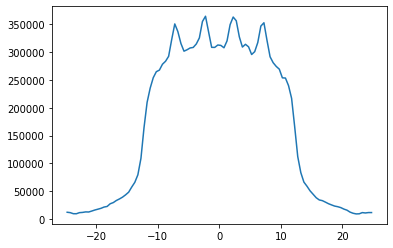

In [12]:
import matplotlib.pyplot as plt

plt.plot(x_cross_section, luminance_cross_section)

Terminemos esta lección comparando los datos de simulación con nuestros datos experimentales.

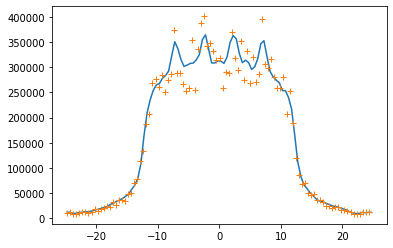

In [13]:
data = np.loadtxt(fname='data/experiment01.csv', delimiter=',')

# Let's set the marker and linestyle to differentiate between the two
plt.plot(x_cross_section, luminance_cross_section)
plt.plot(data[:,0], data[:, 1], marker='+', linestyle=' ')

La comparación se ve bien! Vamos a tener que hacer un poco más de análisis antes de que podamos estar seguros, sin embargo.

De esta manera, hemos pedido a Python que seleccione los datos en función de cómo cumple un criterio en particular. 

# Ejercicio 1* 

Tenga en cuenta este código:

```Python
if 4 > 3:
    print('A')
elif 4 == 5:
    print('B')
elif 4 < 5:
    print('C')
```

¿Cuál de los siguientes se imprimiría si se ejecuta este código? ¿Por qué elegir esta respuesta?
1. A
2. B
3. C
4. B and C

In [14]:
# Enter your solution here
if 4 > 3:
    print('A')
elif 4 == 5:
    print('B')
elif 4 < 5:
    print('C')

A


# Ejercicio 2* - ¿Qué es la Verdad?

`Los booleanos verdaderos y `falsos no son los únicos valores en Python que son verdaderos y falsos. De hecho, cualquier valor se puede usar en un `si` o `elif`. Después de leer y ejecutar el código a continuación, explique cuál es la regla para qué valores se consideran verdaderos y cuáles se consideran falsos.

In [15]:
if '':
    print('empty string is true')
if 'word':
    print('word is true')
if []:
    print('empty list is true')
if [1, 2, 3]:
    print('non-empty list is true')
if 0:
    print('zero is true')
if 1:
    print('one is true')

word is true
non-empty list is true
one is true


In [ ]:
## Ejercicio 05.2

Las listas vacías, las cadenas vacías y el entero `0` son falso.

Las listas pobladas, cadenas y el entero `1` son veraces.


Puede comprobar fácilmente la *Veracidad* o *Falsedad* de un objeto en Python con otra función incorporada, `bool()`. Aplíquelo a cualquier objeto, para inspeccionar si el objeto es *Truthy* o *Falsy*.

In [20]:
# uncomment these one at a time and try them out!
# bool([])
# bool(1.0)
# bool(0.)
# bool('0.')

# Exercise 3

A veces es útil comprobar si alguna condición no es verdadera. El operador booleano `no` puede hacer esto explícitamente. Después de leer y ejecutar el código a continuación, escribe algunas declaraciones if que usen `no` para probar la regla que formulaste en el desafío anterior. Para obtener puntos de bonificación, usa la función `bool()` en tu respuesta.

In [21]:
if not '':
    print('empty string is not true')
if not 'word':
    print('word is not true')
if not not True:
    print('not not True is true')

empty string is not true
not not True is true


In [ ]:

## Ejercicio 05.3

El usuario Check ha utilizado correctamente la sentencia `not` y `bool` (opcional) y la función respectivamente en su código.


# Ejercicio 4* - Casting matrices booleanas

Cuando alimentamos una matriz de `True`s y `False`s en una matriz para extraer los elementos en las ubicaciones a las que los valores `True` corresponden, se llama "*casting*". En el ejemplo anterior tomamos un corte 1D a través de las matrices donde `y == 0.25`. Abajo, he creado dos matrices `A` y `B`. Ambos son 5 x 5. `A` contiene números aleatorios. Devuelve los valores de `B` donde...

- `A` es inferior a 0
- `A` es superior a 0

¿Cuál es el significado de la forma de los arreglos devueltos?

In [16]:
import numpy as np
# numpy tiene un generador de números aleatorios incorporado. Aquí lo usamos para crear una matriz 5x5 donde los elementos son aleatorios
# tomado de la distribución normal estándar (media=0, stdev=1)
# primero arreglamos la semilla de números aleatorios para que obtengamos los mismos resultados cada vez!
np.random.seed(1)
A = np.random.randn(5,5)
B = np.arange(25)
# we can reshape numpy arrays using np.reshape
B = np.reshape(B, (5,5))
A, B


(array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763],
        [-2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038],
        [ 1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944],
        [-1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521],
        [-1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595]]),
 array([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]]))

In [17]:
import numpy as np
# numpy tiene un generador de números aleatorios incorporado. Aquí lo usamos para crear una matriz 5x5 donde los elementos son aleatorios
# tomado de la distribución normal estándar (media=0, stdev=1)
# primero arreglamos la semilla de números aleatorios para que obtengamos los mismos resultados cada vez!
np.random.seed(1)
A = np.random.randn(5,5)
B = np.arange(25)
# we can reshape numpy arrays using np.reshape
B = np.reshape(B, (5,5))

print(B[A>0])
print(B[A<0])


# result is always 1D, or "flat". Boolean casting does NOT slice the array


[ 0  4  6  8 10 14 18 19 21 22 23 24]
[ 1  2  3  5  7  9 11 12 13 15 16 17 20]


# Ejercicio 5 - Arreglos booleanos: `y` y `o`

1. Intente crear una matriz booleana a partir de los datos de luminancia en la simulación 1 donde `y==0.25 o y=-0.25`

¡No funciona! Esto es porque `y` y `o` no operan elementwise como otros operadores que hemos visto hasta ahora. Hay una ambigüedad. ¿Estamos preguntando si los arreglos en sí son Truthy/Falsy o si sus elementos son individualmente Truth/Fals? Esto se refleja en el error que se obtiene. 

```
ValueError: El valor de verdad de una matriz con más de un elemento es ambiguo. Use a.any() o a.all()
```


> Nota: Este error sugiere que reduzca las matrices booleanas a valores únicos (p. ej., si tiene una matriz con una mezcla de Verdadero y Falso, entonces `(y==0.25). any() => True` o si el array es True en todos los elementos entonces `(y==0.25). all() => True`. Vea [all](https://docs.python.org/3/library/functions.html#all) y [any](https://docs.python.org/3/library/functions.html#any) para más información sobre la materia. Aunque, en este ejercicio tenemos que hacer cosas elementwise.

Sin embargo, hay funciones elementwise que podemos usar con matrices booleanas numpy. Estas son 

- `np.logical_and(array1, array2); para `y`
- `np.logical_or(array1, array2)` para `o`

2. Volver a crear la matriz de la primera parte de esta pregunta utilizando `np.logical_or`. 

In [21]:
import numpy as np

# load in the data as we did previously
sim = np.loadtxt(fname='data/simulation01.txt', skiprows=52)
x = sim[:, 0]
y = sim[:, 1]
rad = sim[:, 2]

#(y== 0.25).any() or (y == -0.25).all()
# Enter your solution here
# Find the closest y-value to 0
smallest_y1 = -0.25
smallest_y2 = 0.25

# doesn't work
# L = y[y==smallest_y1 or y==smallest_y2]

np.logical_or(y==smallest_y1, y==smallest_y2)


array([False, False, False, ..., False, False, False])

# Ejercicio 6* - Operadores in situ

Python proporciona operadores in-place que funcionan así:

In [22]:
x = 1  # original value
x += 1 # add one to x, assigning result back to x
x *= 3 # multiply x by 3
print(x)

6


Escribe un código que sume los números positivos y negativos en una lista por separado, usando operadores en el lugar. Es posible que necesite usar la declaración `pass`  (ver más abajo). ¿Crees que el resultado es más o menos legible que escribir lo mismo sin operadores en el lugar? 

> ## La sentencia `pass` pass 
> Es posible que desee utilizar la *declaración* incorporada. Esto le dice a Python que no haga nada y es especialmente útil cuando no quieres que pase nada, pero dejar el código en blanco es un error de sintaxis.
> 
> Por ejemplo:
> 
> ```Python
> for i in range(10):
>     
> ```
> 
> es un error de sintaxis. PERO, 
> 
> ```Python
> for i in range(10):
>     pass
> ```
> 
> es perfectamente válido. Sin embargo, rara vez pasará todas las iteraciones en un bucle. Suponga que desea comprobar la veracidad de cada número y devolverlo si se trata de `True`. Podría utilizar la `pass` declaración de este modo.
> 
> ```Python
> for i in range(10):
>     if bool(i):
>         print(i)
>     else:
>         pass
> ```

In [24]:
positive_sum = 0
negative_sum = 0
test_list = [3, 4, 6, 1, -1, -5, 0, 7, -8]
for num in test_list:
    if num > 0:
        positive_sum += num
    elif num == 0:
        pass
    else:
        negative_sum += num
print(positive_sum, negative_sum)

21 -14


# Puntos clave

- Usar `si` condición para iniciar una sentencia condicional, `elif` condición para proporcionar pruebas adicionales, y `si no` para proporcionar un valor predeterminado.

- Los cuerpos de las ramas de las declaraciones condicionales deben ser sangría.

- Utilizar `==` para comprobar la igualdad.

- `X e Y` sólo es cierto si ambos `X` y `Y` son `True`.

- `X o Y` es cierto si `X` o `Y`, o ambos son `True`.

- Zero, la cadena vacía y la lista vacía se consideran falsas; todos los demás números, cadenas y listas se consideran verdaderas.

- `Verdadero` y `Falso` representan valores de verdad.